<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>Final project on Telco Customer Churn</b></font></div>
<div style = "text-align: leftt"><font><i>By 'Moyosade Jacob</i></font></div>
<div style = "text-align: leftt"><font>19th Feb 2023</font></div>

# Experimentation

1. **Data Ingestion**

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.options.display.max_columns = 200

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [89]:
pwd

'C:\\redoneproj\\Telco_customer_churn'

In [90]:
FILE_NAME = "telco-customer-churn.csv"
DATA_FOLDER = "data"

In [91]:
main_path = os.getcwd()

In [92]:
main_path

'C:\\redoneproj\\Telco_customer_churn'

In [93]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)
file_path

'C:\\redoneproj\\Telco_customer_churn\\data\\telco-customer-churn.csv'

In [94]:
telco_data =pd.read_csv(file_path)

In [95]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
telco_data.shape

(7043, 21)

### Data Inspection

In [97]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
telco_data['TotalCharges'] = (
    pd.to_numeric
    (telco_data
     ['TotalCharges'],
     errors='coerce')
 )


In [99]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##  Exploration Data Analysis

1. ## Model Building

In [100]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [101]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [102]:
X = telco_data[['customerID', 'gender', 'SeniorCitizen', 
                'Partner', 'Dependents',
                'tenure', 'PhoneService', 'MultipleLines',
                'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract', 'PaperlessBilling',
                 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',]]

In [103]:
telco_data_drop=telco_data.drop(["customerID"], axis = 1)

In [104]:
telco_data_drop.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
y = telco_data_drop["Churn"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [107]:
X_train.shape, X_test.shape

((4718, 20), (2325, 20))

## Train Model

In [108]:
train_data, test_data = train_test_split( telco_data_drop, test_size=0.33, random_state=42)

In [109]:
train_data.shape, test_data.shape

((4718, 20), (2325, 20))

In [110]:
label = 'Churn'
print("Summary of class variable: \n", train_data[label].describe())

Summary of class variable: 
 count     4718
unique       2
top         No
freq      3477
Name: Churn, dtype: object


In [111]:
save_path = 'model'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "model\"
AutoGluon Version:  0.6.2
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    4718
Train Data Columns: 19
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Yes) vs negative (No) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preproces

In [112]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.81,0.05,12.90,0.00,0.87,2,True,14
1,LightGBMXT,0.81,0.02,0.80,0.02,0.80,1,True,3
2,NeuralNetTorch,0.81,0.04,11.23,0.04,11.23,1,True,12
3,CatBoost,0.80,0.01,20.11,0.01,20.11,1,True,7
4,LightGBM,0.80,0.02,0.78,0.02,0.78,1,True,4
5,NeuralNetFastAI,0.80,0.04,12.25,0.04,12.25,1,True,10
6,XGBoost,0.80,0.01,1.08,0.01,1.08,1,True,11
7,ExtraTreesEntr,0.80,0.12,1.44,0.12,1.44,1,True,9
8,LightGBMLarge,0.78,0.03,2.02,0.03,2.02,1,True,13
9,RandomForestEntr,0.78,0.12,1.59,0.12,1.59,1,True,6


In [113]:
telco_data_imp  = predictor.feature_importance(telco_data)

These features in provided data are not utilized by the predictor and will be ignored: ['customerID']
Computing feature importance via permutation shuffling for 19 features using 5000 rows with 5 shuffle sets...
	28.63s	= Expected runtime (5.73s per shuffle set)
	11.68s	= Actual runtime (Completed 5 of 5 shuffle sets)


## Model Evaluation 

In [114]:
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating
test_data_nolab.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10


In [115]:
save_model_predictor = TabularPredictor.load(save_path)

In [116]:
y_pred = save_model_predictor.predict(test_data_nolab)

In [117]:
y_pred[0:5]

185     Yes
2715     No
3825     No
1807    Yes
132      No
Name: Churn, dtype: object

In [118]:
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.8008602150537635
Evaluations on test data:
{
    "accuracy": 0.8008602150537635,
    "balanced_accuracy": 0.6714926866069384,
    "mcc": 0.43917707755791546,
    "f1": 0.5141657922350473,
    "precision": 0.7538461538461538,
    "recall": 0.39012738853503187
}


Predictions:  
 185     Yes
2715     No
3825     No
1807    Yes
132      No
1263     No
3732     No
1672     No
811      No
2526     No
2892     No
4129     No
2622     No
3801    Yes
4357     No
6179    Yes
5275     No
4640    Yes
833      No
5194     No
3328    Yes
101      No
6298     No
1090     No
1744     No
6486     No
6370     No
1882     No
3469    Yes
2310     No
6185     No
2726     No
696      No
1483     No
1158     No
3032     No
7037     No
4645     No
6112     No
4395     No
1662    Yes
1345     No
4343    Yes
6119     No
2873     No
1084     No
177      No
5556     No
4810     No
6608     No
393      No
6006     No
3107     No
1817     No
1075     No
2653     No
2164     No
3872     No
1317     No
3254    Yes
3425     No
3658     No
3513     No
2177     No
3593     No
4852     No
1375     No
2533     No
3914     No
3012     No
6633    Yes
321      No
742      No
1149     No
1188     No
2903     No
4333     No
2576     No
2977     No
2678     No
37       No
1795     No


In [119]:
save_model_predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.81,0.80,0.04,0.01,20.11,0.04,0.01,20.11,1,True,7
1,NeuralNetFastAI,0.81,0.80,0.11,0.04,12.25,0.11,0.04,12.25,1,True,10
2,RandomForestGini,0.80,0.78,0.29,0.12,1.47,0.29,0.12,1.47,1,True,5
3,XGBoost,0.80,0.80,0.08,0.01,1.08,0.08,0.01,1.08,1,True,11
4,WeightedEnsemble_L2,0.80,0.81,0.12,0.05,12.90,0.01,0.00,0.87,2,True,14
5,NeuralNetTorch,0.80,0.81,0.08,0.04,11.23,0.08,0.04,11.23,1,True,12
6,LightGBM,0.80,0.80,0.03,0.02,0.78,0.03,0.02,0.78,1,True,4
7,RandomForestEntr,0.80,0.78,0.25,0.12,1.59,0.25,0.12,1.59,1,True,6
8,LightGBMXT,0.80,0.81,0.02,0.02,0.80,0.02,0.02,0.80,1,True,3
9,ExtraTreesEntr,0.80,0.80,0.35,0.12,1.44,0.35,0.12,1.44,1,True,9


In [120]:
test_data["predicted_Churn"] = y_pred

In [121]:
test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predicted_Churn
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes,Yes
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No,No
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70,No,No
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes,Yes
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,No,No


# Maximizing predictive performance

In [122]:
time_limit = 60  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'roc_auc'  # specify your evaluation metric here
predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')


No path specified. Models will be saved in: "AutogluonModels\ag-20230220_071722\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels\ag-20230220_071722\"
AutoGluon Version:  0.6.2
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    4718
Train Data Columns: 19
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification

In [123]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.86,0.84,0.78,0.36,56.65,0.02,0.00,1.25,2,True,5
1,LightGBMXT_BAG_L1,0.86,0.84,0.39,0.18,28.16,0.39,0.18,28.16,1,True,3
2,LightGBM_BAG_L1,0.86,0.84,0.31,0.16,27.21,0.31,0.16,27.21,1,True,4
3,KNeighborsUnif_BAG_L1,0.75,0.73,0.05,0.02,0.04,0.05,0.02,0.04,1,True,1
4,KNeighborsDist_BAG_L1,0.74,0.72,0.04,0.02,0.03,0.04,0.02,0.03,1,True,2


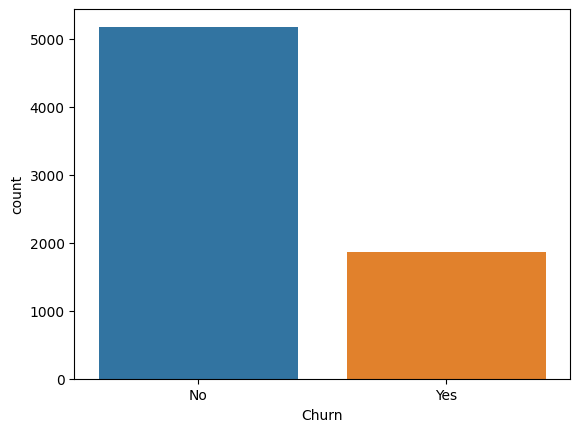

In [127]:
sns.countplot(x='Churn',data=telco_data)
plt.show()

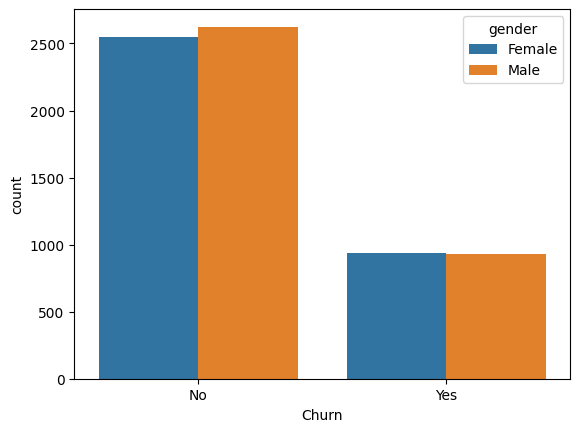

In [128]:
sns.countplot(x='Churn',hue='gender',data=telco_data)
plt.show()